In [5]:
!pip install yfinance

  Created wheel for yfinance: filename=yfinance-0.1.54-py2.py3-none-any.whl size=22409 sha256=682d6239f21cf2fea852fb6887364f8e5dc9a6f0098b35c1c5b2a125ffd0dc09
  Stored in directory: /root/.cache/pip/wheels/f9/e3/5b/ec24dd2984b12d61e0abf26289746c2436a0e7844f26f2515c
Successfully built yfinance


In [74]:
import pandas as pd
import yfinance
import plotly.express as px
from fbprophet import Prophet
from fbprophet.plot import plot_plotly

In [7]:
components = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
components = components.drop('SEC filings', axis=1).set_index('Symbol')

In [8]:
components

,Security,GICS Sector,GICS Sub Industry,Headquarters Location,Date first added,CIK,Founded
Symbol,,,,,,,
MMM,3M Company,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",1976-08-09,66740,1902
ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
ABBV,AbbVie Inc.,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
ABMD,ABIOMED Inc,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,815094,1981
ACN,Accenture plc,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
...,...,...,...,...,...,...,...
YUM,Yum! Brands Inc,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
ZBH,Zimmer Biomet Holdings,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927


In [19]:
components.index.sort_values()#, index=3,format_func=label

Index(['A', 'AAL', 'AAP', 'AAPL', 'ABBV', 'ABC', 'ABMD', 'ABT', 'ACN', 'ADBE',
       ...
       'XLNX', 'XOM', 'XRAY', 'XRX', 'XYL', 'YUM', 'ZBH', 'ZBRA', 'ZION',
       'ZTS'],
      dtype='object', name='Symbol', length=505)

In [20]:
asset = 'AAPL'

In [22]:
df = yfinance.download(asset)
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.101261,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.095978,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.088934,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.091135,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.093777,73449600
...,...,...,...,...,...,...
2020-09-16,115.230003,116.000000,112.040001,112.129997,112.129997,154679000
2020-09-17,109.720001,112.199997,108.709999,110.339996,110.339996,178011000
2020-09-18,110.400002,110.879997,106.089996,106.839996,106.839996,287104900


In [52]:
data = df.copy().dropna()
data.index.name = None
data

,Open,High,Low,Close,Adj Close,Volume
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.101261,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.095978,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.088934,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.091135,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.093777,73449600
...,...,...,...,...,...,...
2020-09-16,115.230003,116.000000,112.040001,112.129997,112.129997,154679000
2020-09-17,109.720001,112.199997,108.709999,110.339996,110.339996,178011000
2020-09-18,110.400002,110.879997,106.089996,106.839996,106.839996,287104900
2020-09-21,104.540001,110.190002,103.099998,110.080002,110.080002,195713800


In [53]:
section = min([2000, df.shape[0]])
section

2000

In [62]:
data2 = data[-section:]['Adj Close'].to_frame('Price')
data2['Date'] = data2.index
data2

,Price,Date
2012-10-10,19.864758,2012-10-10
2012-10-11,19.467718,2012-10-11
2012-10-12,19.517622,2012-10-12
2012-10-15,19.674141,2012-10-15
2012-10-16,20.139996,2012-10-16
...,...,...
2020-09-16,112.129997,2020-09-16
2020-09-17,110.339996,2020-09-17
2020-09-18,106.839996,2020-09-18
2020-09-21,110.080002,2020-09-21


In [63]:
import plotly.express as px

fig2 = px.line(data2,x='Date', y="Price",title = 'the Title ')
fig2.update_xaxes(
    rangeslider_visible= True,
    rangeselector=dict(
                        buttons = list([
                        dict(count = 3,label = '1y',step='year',stepmode = "backward"),
                        dict(count = 9,label = '3y',step='year',stepmode = "backward"),
                        dict(count = 15,label = '5y',step='year',stepmode = "backward"),
                        dict(step= 'all')
                            ])        
                        )
                )
fig2.show()

In [92]:
data2 = (
        data2['Price']
        .dropna()
        .to_frame()
        .reset_index()
        .rename(columns={"index": "ds", 'Price': "y"})
    )

In [93]:
data2

,ds,y
0,2012-10-10,19.864758
1,2012-10-11,19.467718
2,2012-10-12,19.517622
3,2012-10-15,19.674141
4,2012-10-16,20.139996
...,...,...
1995,2020-09-16,112.129997
1996,2020-09-17,110.339996
1997,2020-09-18,106.839996
1998,2020-09-21,110.080002


In [94]:
model = Prophet()
model.fit(data2)
future = model.make_future_dataframe(periods=90)
forecast = model.predict(future)

fig = plot_plotly(model, forecast)
fig.update_layout(
    title='title', yaxis_title='y', xaxis_title="Date",
)
fig.show()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


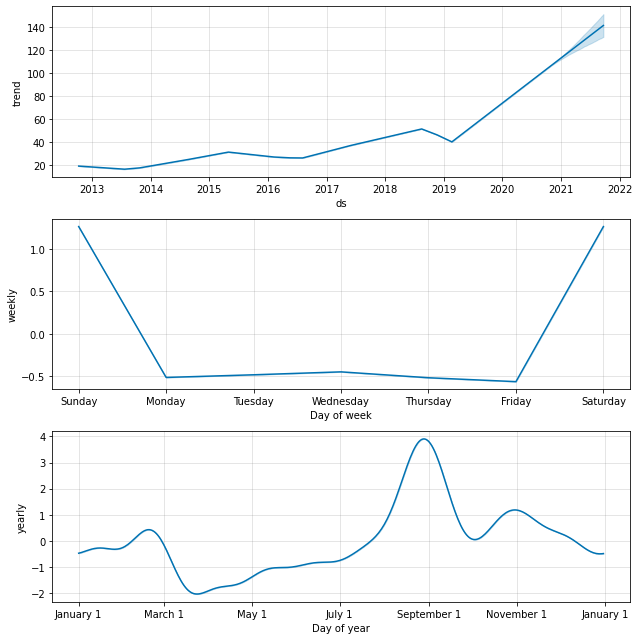

In [104]:
model.plot_components(prediction)
plt.show()

In [95]:
# # Select only the important features i.e. the date and price
# data = data[["Date","Close"]] # select Date and Price
# # Rename the features: These names are NEEDED for the model fitting
# data = data.rename(columns = {"Date":"ds","Close":"y"}) #renaming the columns of the dataset
# data.head(5)

In [96]:
from fbprophet import Prophet
import matplotlib.pyplot as plt

m = Prophet(daily_seasonality = True) # the Prophet class (model)
m.fit(data2) # fit the model using all data

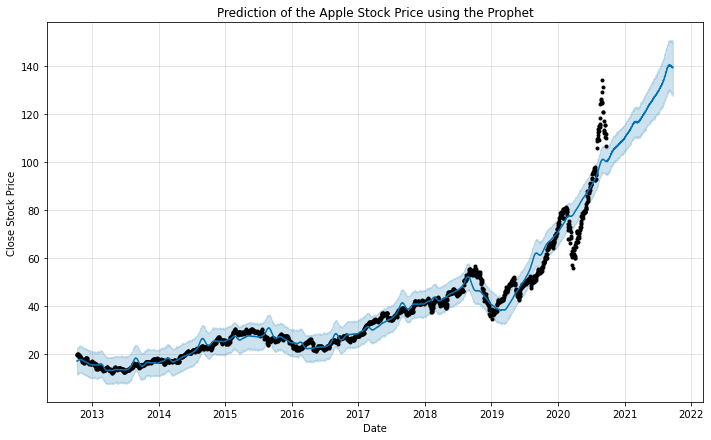

In [97]:
future = m.make_future_dataframe(periods=365) #we need to specify the number of days in future
prediction = m.predict(future)
m.plot(prediction)
plt.title("Prediction of the Apple Stock Price using the Prophet")
plt.xlabel("Date")
plt.ylabel("Close Stock Price")
plt.show()